<a href="https://colab.research.google.com/github/SharifNirjon/customer-churn/blob/notebooks%2Feda-processing/eda_processing_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
import joblib
from pathlib import Path

In [9]:
import kagglehub
import pandas as pd
import os


path = kagglehub.dataset_download("davidlaya/telco-customer-churn-2")

files = os.listdir(path)
print("Available files:", files)

for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, file))
        print(f"Loaded CSV: {file}")
        original_filename = file
        break
    elif file.endswith('. xlsx'):
        df = pd.read_excel(os.path. join(path, file))
        print(f"Loaded Excel:  {file}")
        original_filename = file
        break


save_path = r"D:\book\customer churn\Dataset"
os.makedirs(save_path, exist_ok=True)

output_file = os.path.join(save_path, "telco_churn_data.csv")
df.to_csv(output_file, index=False)
print(f"\n Data saved to: {output_file}")

print(f" File size: {os.path.getsize(output_file) / 1024:.2f} KB")

100%|██████████| 65.3k/65.3k [00:00<00:00, 42.3MB/s]

Extracting files...
Available files: ['WA_Fn-UseC_-Telco-Customer-Churn_2.csv']
Loaded CSV: WA_Fn-UseC_-Telco-Customer-Churn_2.csv

✅ Data saved to: D:\book\customer churn\Dataset/telco_churn_data.csv
✅ File size: 566.28 KB


In [10]:
print("Shape: ", df.shape)
print("Columns :\n", df.columns)
df.head()

Shape:  (4265, 21)
Columns :
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
1,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two years,Yes,Bank transfer (automatic),21.15,1419.40,No
2,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
3,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Pre-processing

In [46]:
import pandas as pd
import numpy as np

# 1. Drop only customerID
df = df.drop(columns=['customerID'], errors='ignore')

# 2. Convert TotalCharges to numeric (handle errors)
df['TotalCharges'] = pd. to_numeric(df['TotalCharges'], errors='coerce')

# 3. Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges']).copy()

# Before processing Churn, let's ensure it's handled correctly based on potential previous states.
# As per earlier analysis (MgBlOxF6Iq), Churn already seems to be float (0.0, 1.0, nan).
# If 'Churn' was originally 'Yes'/'No' and got partially mapped to float, we need to re-map.
# Assuming 'Yes' and 'No' are the only string values expected for churn if it's not already numeric 0/1/NaN.
# Let's ensure it's numeric 0/1, and then drop rows where it's NaN.

# First, standardize possible string representations to a consistent format if they exist.
# If Churn column is object type, convert 'Yes' to 1 and 'No' to 0.
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Ensure the 'Churn' column is numeric, coercing errors to NaN.
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

# 4. Drop rows with missing Churn values (target variable)
df = df.dropna(subset=['Churn']).copy()

# 5. Check the result
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns:  {df.columns.tolist()}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nChurn distribution:\n{df['Churn'].value_counts()}")

KeyError: 'Churn'

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,0.0
1,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two years,Yes,Bank transfer (automatic),21.15,1419.40,0.0
2,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0.0
3,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0.0
4,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0.0


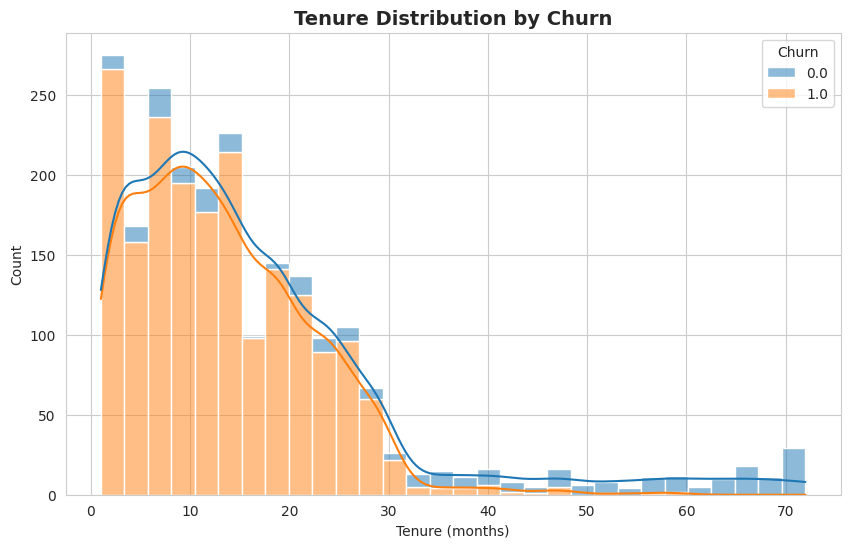

/tmp/ipython-input-228791035.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')


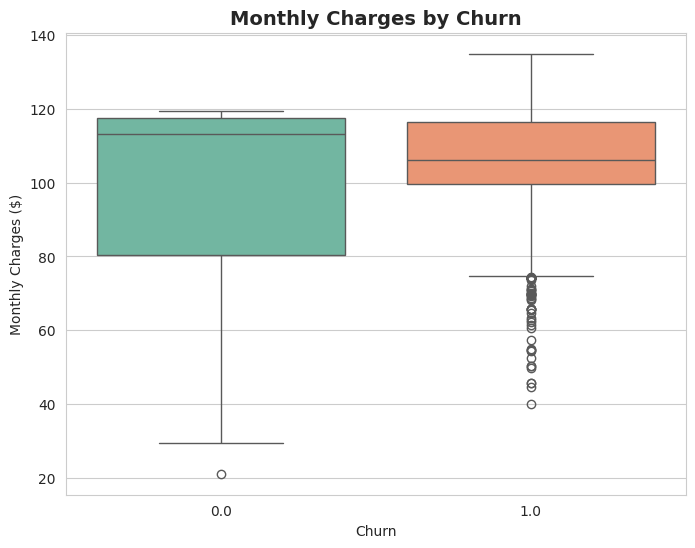

/tmp/ipython-input-228791035.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set3')


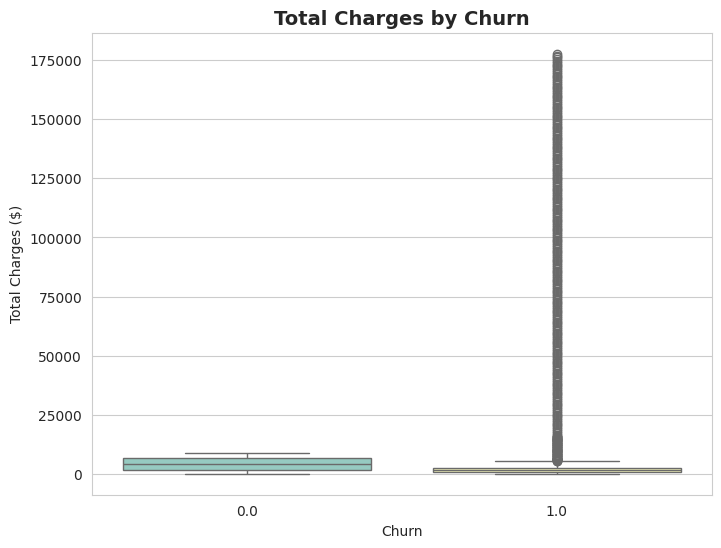

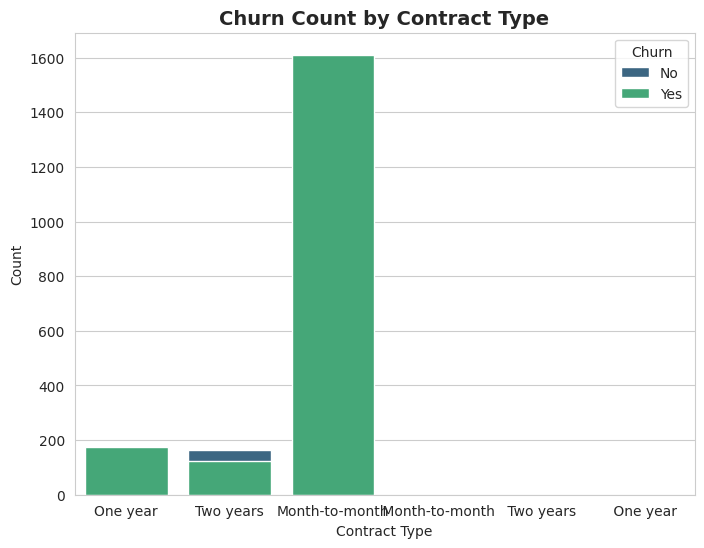

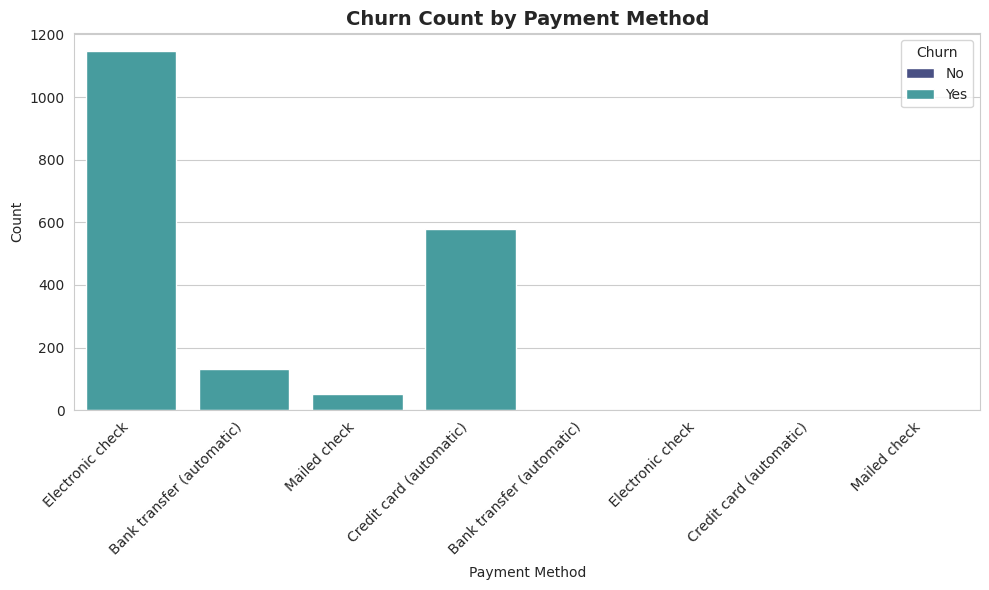

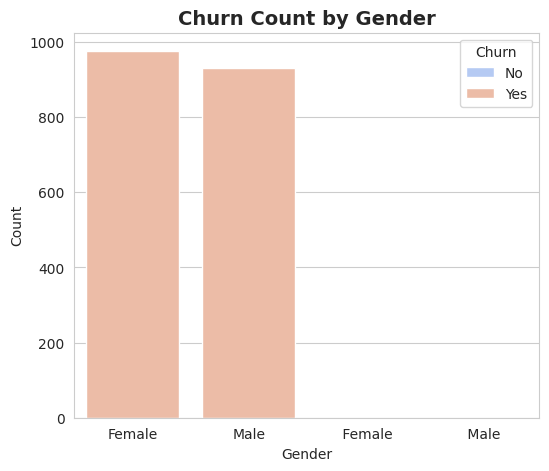

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================
# 1. TENURE DISTRIBUTION
# ============================================
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

# ============================================
# 2. MONTHLY CHARGES DISTRIBUTION
# ============================================
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges by Churn', fontsize=14, fontweight='bold')
plt.ylabel('Monthly Charges ($)')
plt.show()

# ============================================
# 3. TOTAL CHARGES DISTRIBUTION
# ============================================
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set3')
plt.title('Total Charges by Churn', fontsize=14, fontweight='bold')
plt.ylabel('Total Charges ($)')
plt.show()

# ============================================


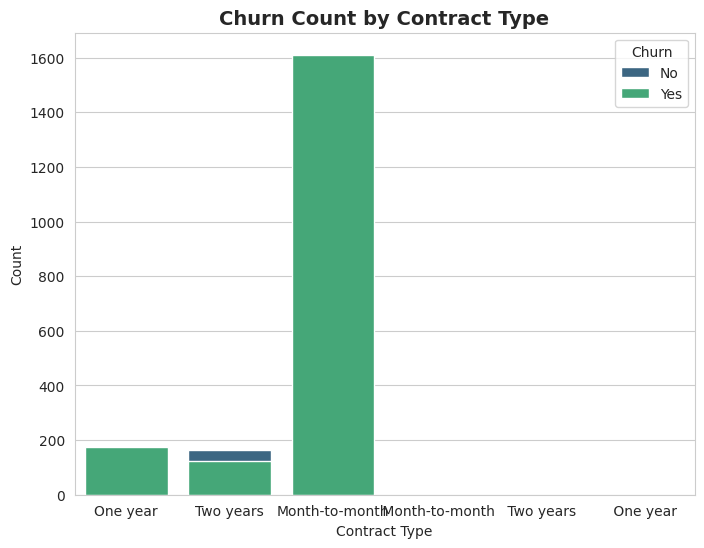

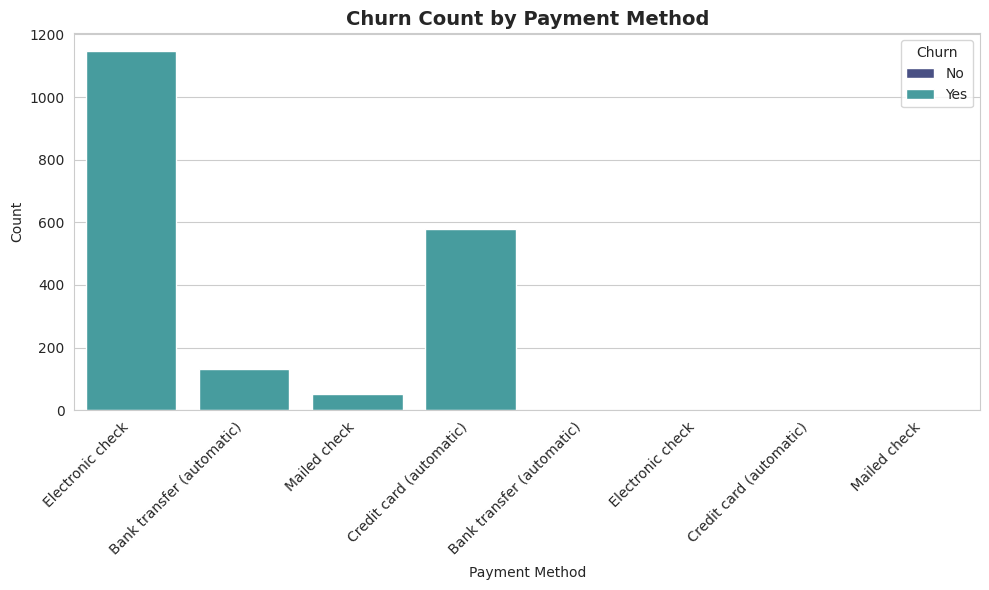

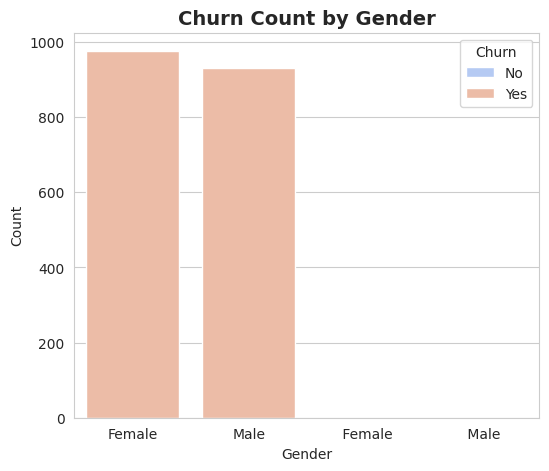

In [21]:
# 4. CONTRACT TYPE VS CHURN
# ============================================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Count by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 5. PAYMENT METHOD VS CHURN
# ============================================
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='mako')
plt.xticks(rotation=45, ha='right')
plt.title('Churn Count by Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# ============================================
# 6. GENDER VS CHURN
# ============================================
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='gender', hue='Churn', palette='coolwarm')
plt.title('Churn Count by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

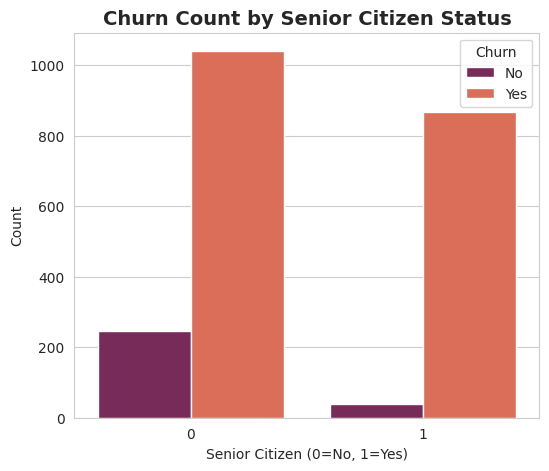

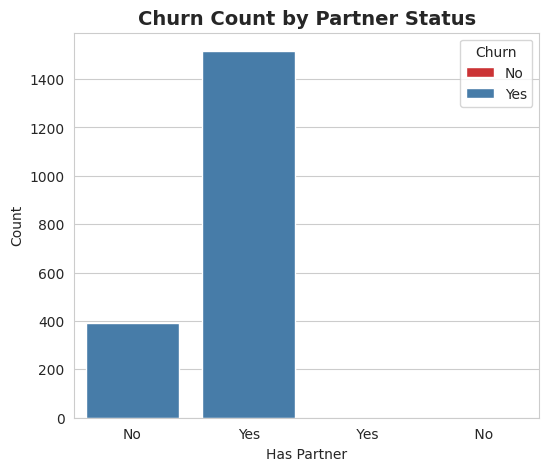

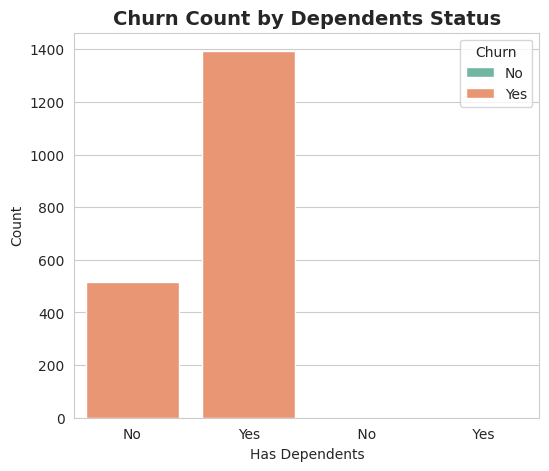

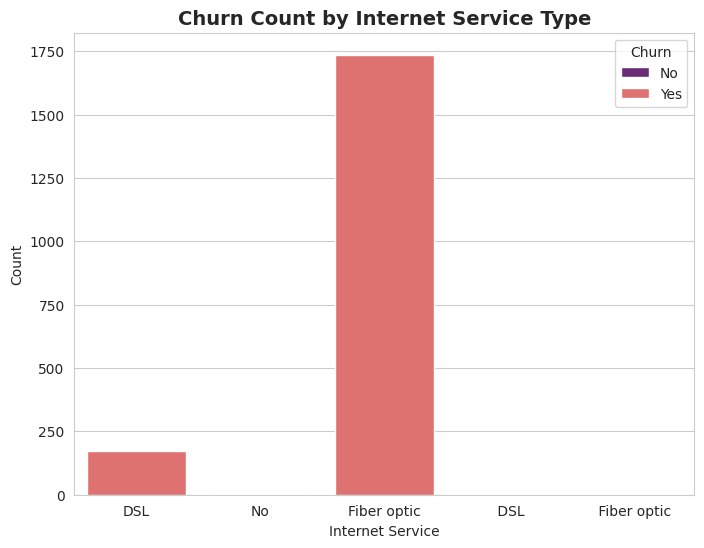

In [22]:
# 7. SENIOR CITIZEN VS CHURN
# ============================================
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='rocket')
plt.title('Churn Count by Senior Citizen Status', fontsize=14, fontweight='bold')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 8. PARTNER STATUS VS CHURN
# ============================================
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Partner', hue='Churn', palette='Set1')
plt.title('Churn Count by Partner Status', fontsize=14, fontweight='bold')
plt.xlabel('Has Partner')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 9. DEPENDENTS VS CHURN
# ============================================
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set2')
plt.title('Churn Count by Dependents Status', fontsize=14, fontweight='bold')
plt.xlabel('Has Dependents')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 10. INTERNET SERVICE VS CHURN
# ============================================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='magma')
plt.title('Churn Count by Internet Service Type', fontsize=14, fontweight='bold')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

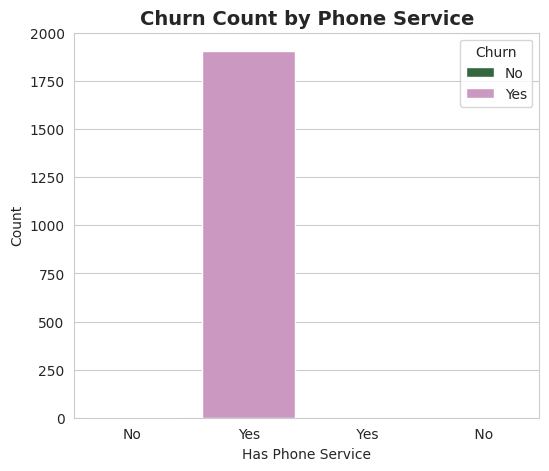

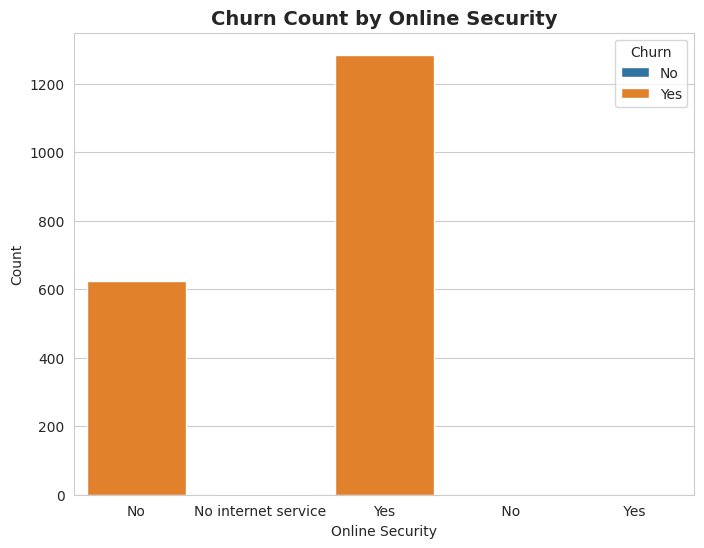

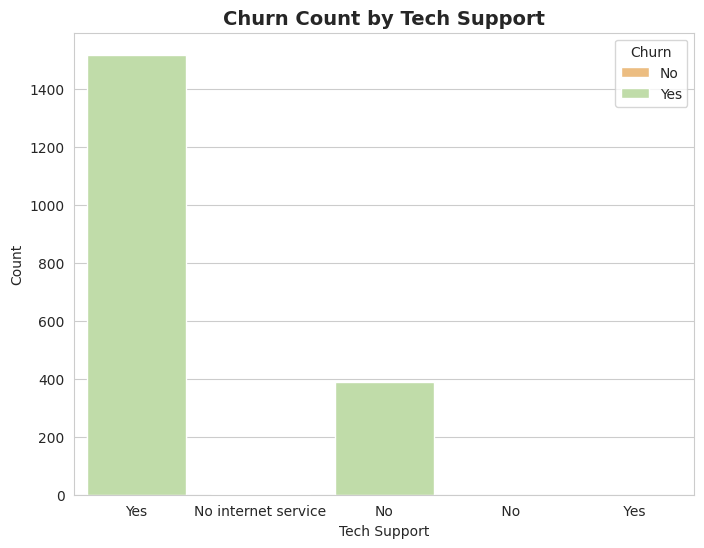

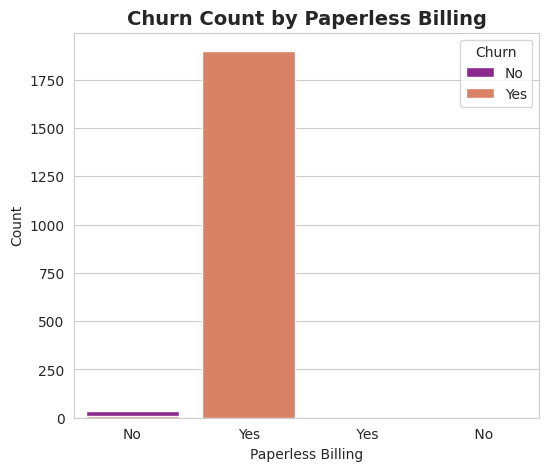

In [23]:
# 11. PHONE SERVICE VS CHURN
# ============================================
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='cubehelix')
plt.title('Churn Count by Phone Service', fontsize=14, fontweight='bold')
plt.xlabel('Has Phone Service')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 12. ONLINE SECURITY VS CHURN
# ============================================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='tab10')
plt.title('Churn Count by Online Security', fontsize=14, fontweight='bold')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 13. TECH SUPPORT VS CHURN
# ============================================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Spectral')
plt.title('Churn Count by Tech Support', fontsize=14, fontweight='bold')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 14. PAPERLESS BILLING VS CHURN
# ============================================
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='plasma')
plt.title('Churn Count by Paperless Billing', fontsize=14, fontweight='bold')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

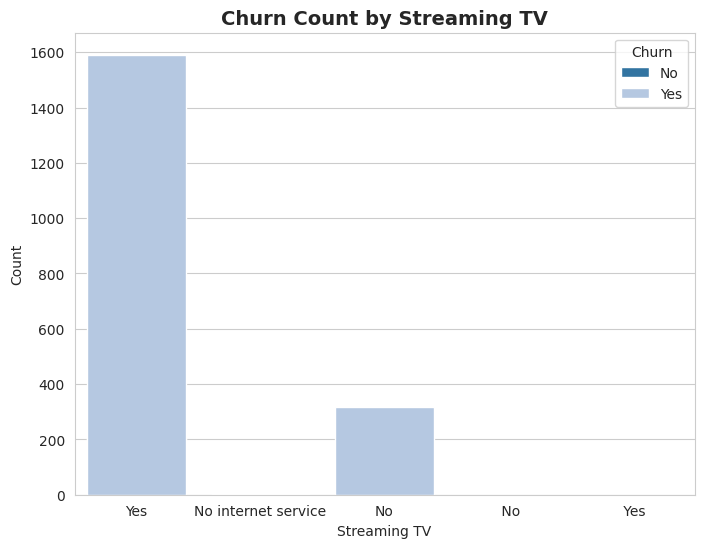

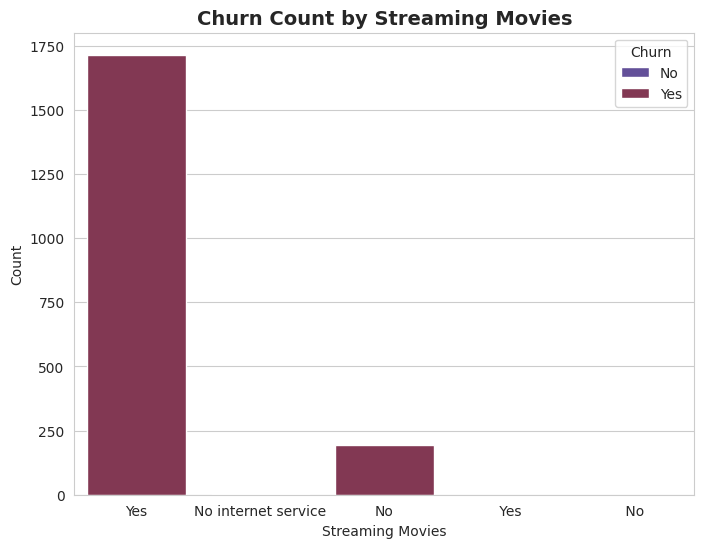

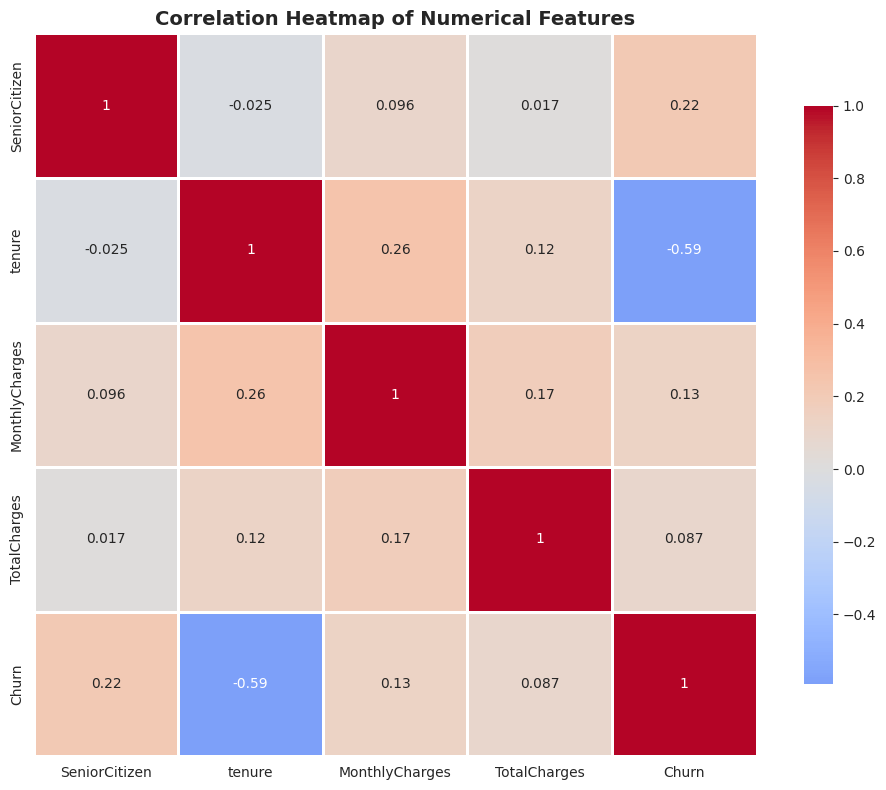

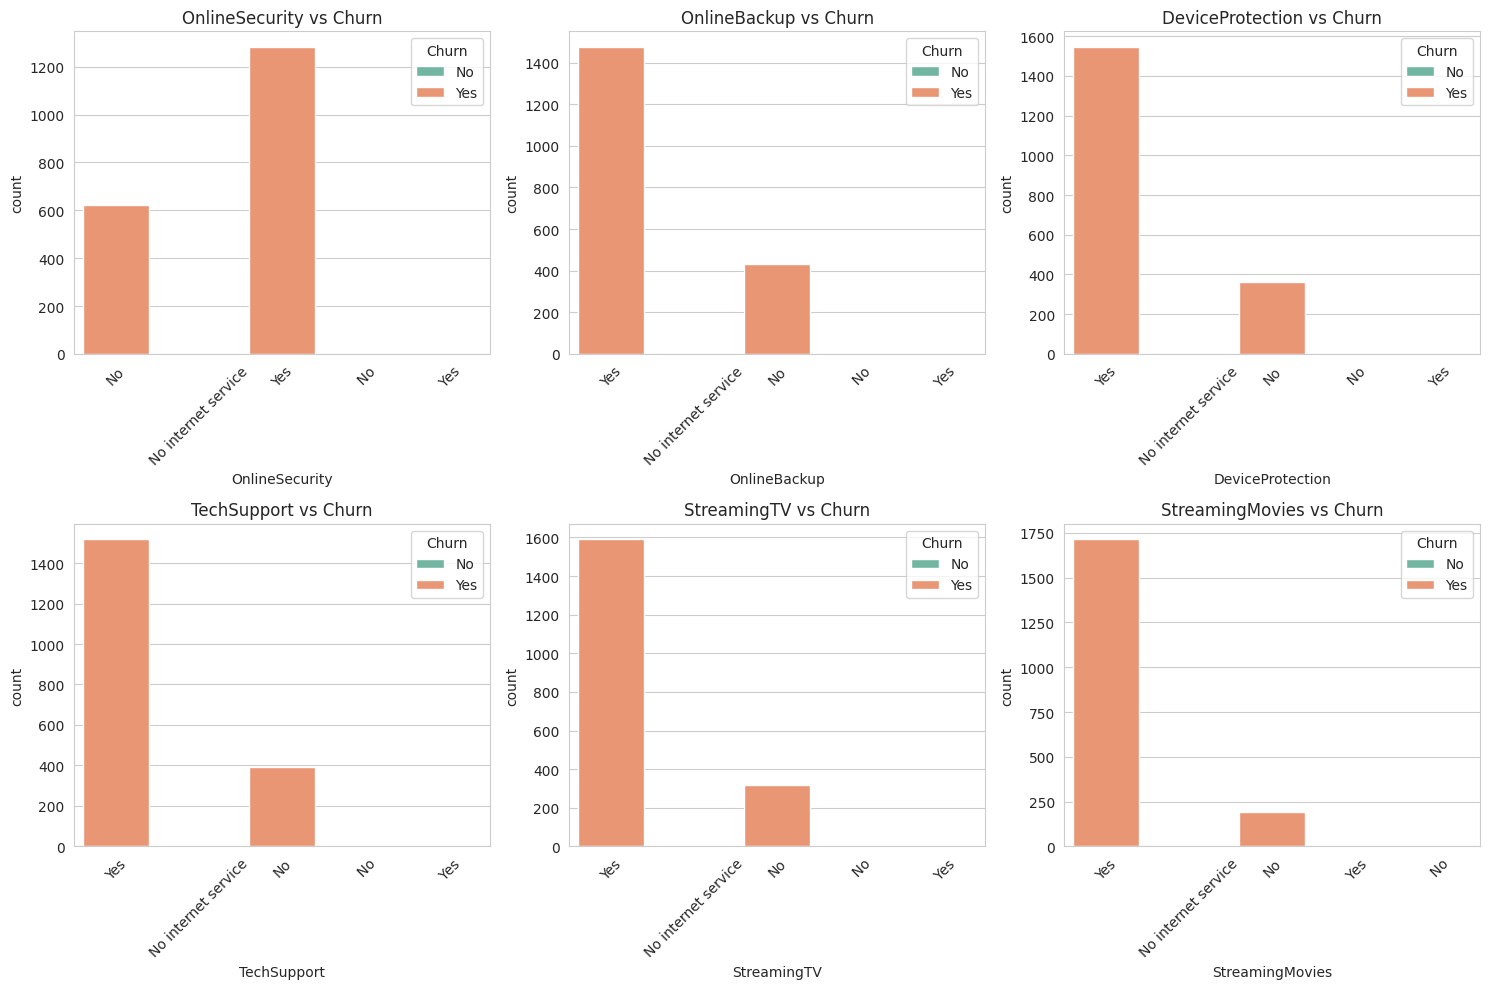

In [24]:
# 15. STREAMING TV VS CHURN
# ============================================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='tab20')
plt.title('Churn Count by Streaming TV', fontsize=14, fontweight='bold')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 16. STREAMING MOVIES VS CHURN
# ============================================
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='twilight')
plt.title('Churn Count by Streaming Movies', fontsize=14, fontweight='bold')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# ============================================
# 17. CORRELATION HEATMAP (Numerical Features)
# ============================================
plt.figure(figsize=(10, 8))
# Select only numerical columns
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
# Convert Churn to numerical if it's not already
df_corr = df[numerical_cols].copy()
if df['Churn'].dtype == 'object':
    df_corr['Churn'] = df['Churn'].map({'No':  0, 'Yes': 1})
else:
    df_corr['Churn'] = df['Churn']

correlation_matrix = df_corr. corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================
# 18. CHURN RATE BY SERVICE COMBINATIONS
# ============================================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

for idx, service in enumerate(services):
    row = idx // 3
    col = idx % 3
    sns.countplot(data=df, x=service, hue='Churn', ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{service} vs Churn')
    axes[row, col]. legend(title='Churn', labels=['No', 'Yes'])
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

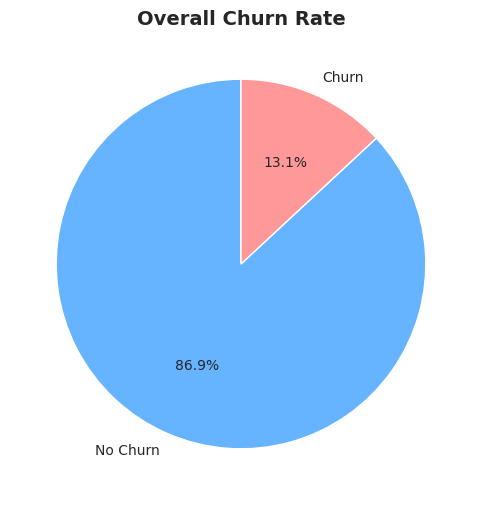

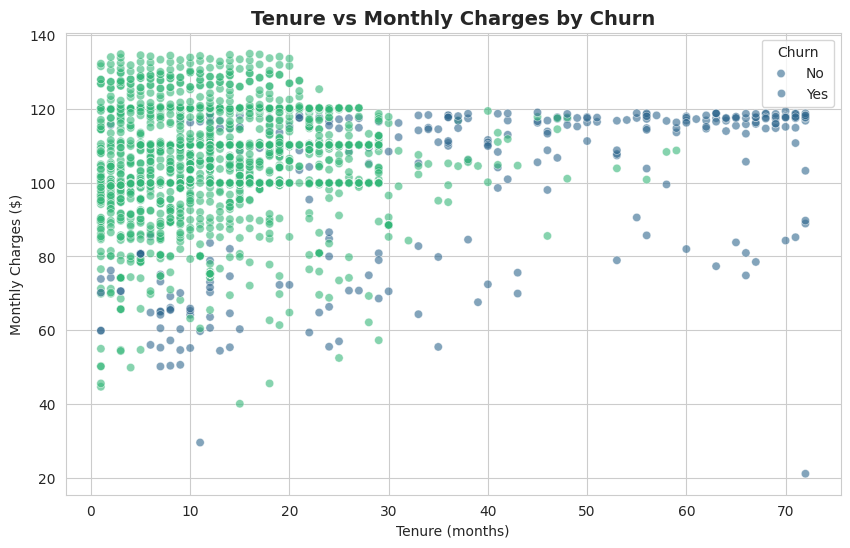

In [25]:
# 19. OVERALL CHURN RATE
# ============================================
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Overall Churn Rate', fontsize=14, fontweight='bold')
plt.show()

# ============================================
# 20. TENURE VS MONTHLY CHARGES (Scatter)
# ============================================
plt. figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn',
                alpha=0.6, palette='viridis')
plt.title('Tenure vs Monthly Charges by Churn', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


In [26]:
print("="*100)
print(" " * 35 + "DATASET OVERVIEW")
print("="*100)
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nColumn Names:\n{df.columns.tolist()}\n")

                                   DATASET OVERVIEW
Total Rows: 4265
Total Columns: 20

Column Names:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']



In [27]:
import pandas as pd
import numpy as np

print("="*100)
print(" " * 35 + "DATASET OVERVIEW")
print("="*100)
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nColumn Names:\n{df.columns.tolist()}\n")

print("="*100)
print(" " * 30 + "DETAILED COLUMN ANALYSIS")
print("="*100)

for idx, col in enumerate(df.columns, 1):
    print(f"\n[{idx}/{len(df.columns)}] Column: '{col}'")
    print("-" * 100)

    # Basic info
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    num_missing = df[col].isnull().sum()
    missing_pct = (num_missing / len(df)) * 100

    print(f"├── Data Type: {df[col].dtype}")
    print(f"├── Unique Values: {num_unique}")
    print(f"├── Missing Values: {num_missing} ({missing_pct:.2f}%)")

    # Unique values display
    print(f"├── Unique Values List:")
    if num_unique <= 10:
        print(f"│   {unique_values}")
    else:
        print(f"│   {unique_values[:10]}...  (showing first 10)")

    # Value counts for categorical
    if num_unique < 20:
        print(f"└── Value Distribution:")
        value_counts = df[col].value_counts()
        for val, count in value_counts. items():
            percentage = (count / len(df)) * 100
            print(f"    • {val}: {count} ({percentage:.2f}%)")

    # Statistics for numerical
    elif df[col].dtype in ['int64', 'float64']:
        print(f"└── Statistics:")
        print(f"    • Min: {df[col].min()}")
        print(f"    • Max: {df[col].max()}")
        print(f"    • Mean: {df[col].mean():.2f}")
        print(f"    • Median: {df[col].median():.2f}")
        print(f"    • Std Dev: {df[col].std():.2f}")

print("\n" + "="*100)
print(" " * 40 + "ANALYSIS COMPLETE")
print("="*100)

                                   DATASET OVERVIEW
Total Rows: 4265
Total Columns: 20

Column Names:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

                              DETAILED COLUMN ANALYSIS

[1/20] Column: 'gender'
----------------------------------------------------------------------------------------------------
├── Data Type: object
├── Unique Values: 4
├── Missing Values: 0 (0.00%)
├── Unique Values List:
│   ['Female' 'Male' ' Female' ' Male']
└── Value Distribution:
    • Female: 1143 (26.80%)
    • Male: 1052 (24.67%)
    •  Female: 1038 (24.34%)
    •  Male: 1032 (24.20%)

[2/20] Column: 'SeniorCitizen'
----------------------------------------------------------------------------------------------------
├─

In [47]:

# Define multi-class categorical columns (columns with multiple categories to encode)
multi_class_cols = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]

# Define numerical columns (already numeric, no encoding needed)
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply One-Hot Encoding to multi-class categorical columns
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

print("Encoding complete!")
print(f"New shape: {df.shape}")
print(f"\nNew columns after encoding:\n{df.columns.tolist()}")

KeyError: "None of [Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',\n       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',\n       'Contract', 'PaymentMethod'],\n      dtype='object')] are in the [columns]"

In [31]:
import pandas as pd

# Note: Assuming encoding has already occurred in a previous cell (e.g., XyfRPu4PGFvO).
# This cell is modified to verify the results without re-encoding.

# 1. Check original data (before this cell's potential re-encoding)
print("BEFORE ENCODING (based on current df state from previous cells):")
print(f"Shape: {df.shape}")
# The original 'Contract' column no longer exists if previous encoding ran.
# Instead of checking original 'Contract' values, we check for new columns.
print(f"Example of new Contract columns: {[col for col in df.columns if 'Contract_' in col][:5]}...")

# 2. Define columns (these definitions are from the original cell, but the encoding step is commented out)
multi_class_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 3. Encode (This step is commented out to avoid redundant encoding if cell XyfRPu4PGFvO already ran)
# df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# 4. Verify
print("\nAFTER ENCODING (verified state):")
print(f"Shape: {df.shape}")
print(f"New columns (Contract related): {[col for col in df.columns if 'Contract_' in col]}")
print(f"\nSample data:\n{df.head()}")

BEFORE ENCODING (based on current df state from previous cells):
Shape: (4265, 54)
Example of new Contract columns: ['Contract_ One year', 'Contract_ Two years', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two years']...

AFTER ENCODING (verified state):
Shape: (4265, 54)
New columns (Contract related): ['Contract_ One year', 'Contract_ Two years', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two years']

Sample data:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0      No         No      12           No   
1  Female              0      No         No      72          Yes   
2    Male              0     Yes        Yes      24          Yes   
3  Female              0     Yes        Yes      72          Yes   
4  Female              0     Yes        Yes      11           No   

  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0               No           60.65        743.30    0.0  ...   
1             

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two years,PaymentMethod_ Credit card (automatic),PaymentMethod_ Electronic check,PaymentMethod_ Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,No,No,12,No,No,60.65,743.30,0.0,...,False,True,False,False,False,False,False,False,True,False
1,Female,0,No,No,72,Yes,Yes,21.15,1419.40,0.0,...,False,False,True,False,False,False,True,False,False,False
2,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.50,0.0,...,False,True,False,False,False,False,False,False,False,True
3,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.90,0.0,...,False,True,False,False,False,False,False,True,False,False
4,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,0.0,...,True,False,False,False,False,False,False,False,True,False


In [34]:
# After encoding, verify everything is binary (0 and 1)
print("Checking encoded columns:")
encoded_cols = [col for col in df.columns if '_' in col]  # Encoded columns have underscores

for col in encoded_cols:
    unique_vals = df[col].unique()
    if not set(unique_vals).issubset({0, 1, 0, 0, 1.0}):
        print(f"❌ WARNING: {col} has unexpected values:  {unique_vals}")
    else:
        print(f"✅ {col}: OK")

Checking encoded columns:
✅ MultipleLines_ Yes: OK
✅ MultipleLines_No: OK
✅ MultipleLines_No phone service: OK
✅ MultipleLines_Yes: OK
✅ InternetService_ Fiber optic: OK
✅ InternetService_DSL: OK
✅ InternetService_Fiber optic: OK
✅ InternetService_No: OK
✅ OnlineSecurity_ Yes: OK
✅ OnlineSecurity_No: OK
✅ OnlineSecurity_No internet service: OK
✅ OnlineSecurity_Yes: OK
✅ OnlineBackup_ Yes: OK
✅ OnlineBackup_No: OK
✅ OnlineBackup_No internet service: OK
✅ OnlineBackup_Yes: OK
✅ DeviceProtection_ Yes: OK
✅ DeviceProtection_No: OK
✅ DeviceProtection_No internet service: OK
✅ DeviceProtection_Yes: OK
✅ TechSupport_ Yes: OK
✅ TechSupport_No: OK
✅ TechSupport_No internet service: OK
✅ TechSupport_Yes: OK
✅ StreamingTV_ Yes: OK
✅ StreamingTV_No: OK
✅ StreamingTV_No internet service: OK
✅ StreamingTV_Yes: OK
✅ StreamingMovies_ Yes: OK
✅ StreamingMovies_No: OK
✅ StreamingMovies_No internet service: OK
✅ StreamingMovies_Yes: OK
✅ Contract_ One year: OK
✅ Contract_ Two years: OK
✅ Contract_Month-t

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import joblib
import os # Added os import for path checking

print("="*100)
print(" " * 30 + "DATA PREPROCESSING PIPELINE")
print("="*100)

# ============================================
# Robust DataFrame Initialization
# ============================================
# Check if df is in the expected state (e.g., 'Churn' column exists and 'tenure' is not scaled)
initial_check_passed = False
if 'Churn' in df.columns and not (np.isclose(df['tenure'].mean(), 0, atol=1e-2) and np.isclose(df['tenure'].std(), 1, atol=1e-2)):
    initial_check_passed = True

if not initial_check_passed:
    print("\n⚠️  Detected inconsistent DataFrame state (missing 'Churn' or 'tenure' already scaled). Re-initializing df...")

    output_file = r"/data/telco_churn_data.csv" # Assuming this is the path where raw data was saved
    if not os.path.exists(output_file):
        # Fallback to kagglehub download if local file not found (e.g., first run in new session)
        print("   Raw data file not found at expected path. Attempting kagglehub download.")
        import kagglehub # Re-import if not globally available
        path = kagglehub.dataset_download("davidlaya/telco-customer-churn-2")
        for file in os.listdir(path):
            if file.endswith('.csv'):
                df_raw_reloaded = pd.read_csv(os.path.join(path, file))
                break
        else:
            raise ValueError("Could not re-download raw CSV data from KaggleHub.")
    else:
        df_raw_reloaded = pd.read_csv(output_file)

    # Apply MxxYL5AtqiF1 logic (Cleaning and Churn handling)
    df_reprocessed = df_raw_reloaded.drop(columns=['customerID'], errors='ignore')
    df_reprocessed['TotalCharges'] = pd.to_numeric(df_reprocessed['TotalCharges'], errors='coerce')
    df_reprocessed = df_reprocessed.dropna(subset=['TotalCharges']).copy()

    if df_reprocessed['Churn'].dtype == 'object':
        df_reprocessed['Churn'] = df_reprocessed['Churn'].map({'Yes': 1, 'No': 0})
    df_reprocessed['Churn'] = pd.to_numeric(df_reprocessed['Churn'], errors='coerce')
    df_reprocessed = df_reprocessed.dropna(subset=['Churn']).copy()

    # Apply XyfRPu4PGFvO logic (One-Hot Encoding)
    multi_class_cols_for_reprocessing = [
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaymentMethod'
    ]
    df = pd.get_dummies(df_reprocessed, columns=multi_class_cols_for_reprocessing, drop_first=True)
    print("   'df' successfully re-initialized with cleaned and encoded data.")
else:
    print("\n✅ DataFrame state appears consistent. Proceeding with current 'df'.")

# ============================================
# STEP 1: TENURE BINNING
# ============================================
print("\n📊 STEP 1: Creating Tenure Buckets")
print("-" * 100)

# At this point, df['tenure'] should be the unscaled version from the re-initialization
tenure_for_binning = df['tenure'].copy()

print("Tenure range used for binning (current 'df['tenure']'):")
print(f"   Min: {tenure_for_binning.min():.2f}, Max: {tenure_for_binning.max():.2f}")

df['tenure_bucket'] = pd.cut(tenure_for_binning,
                              bins=[0, 12, 24, 48, 60, 72],
                              labels=False, include_lowest=True)

print("\nTenure bucket mapping:")
print("   Bucket 0: 0-12 months (New customers)")
print("   Bucket 1: 13-24 months (Early customers)")
print("   Bucket 2: 25-48 months (Mid-term customers)")
print("   Bucket 3: 49-60 months (Long-term customers)")
print("   Bucket 4: 61-72 months (Loyal customers)")

print("\nTenure bucket distribution:")
print(df['tenure_bucket'].value_counts().sort_index())

print("\nSample comparison:")
sample_df = df[['tenure', 'tenure_bucket']].head(10) # Use df['tenure'] here, which is still unscaled for now
print(sample_df.to_string(index=False))

# ============================================
# STEP 2: FEATURE SCALING
# ============================================
print("\n" + "="*100)
print("📏 STEP 2: Standardizing Numerical Features")
print("-" * 100)

# Define numerical columns to be scaled
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Before scaling - Statistics:")
print(df[numerical_cols].describe())

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("   Numerical columns scaled.")

print("\nAfter scaling - Statistics:")
print(df[numerical_cols].describe())

print("\nScaling parameters saved:")
for idx, col in enumerate(numerical_cols):
    print(f"   {col}:")
    print(f"      Mean: {scaler.mean_[idx]:.2f}")
    print(f"      Std Dev: {scaler.scale_[idx]:.2f}")

# ============================================
# STEP 3: SAVE SCALER
# ============================================
print("\n" + "="*100)
print("💾 STEP 3: Saving Scaler for Future Use")
print("-" * 100)

scaler_path = Path.cwd().parent / "models" / "scaler.joblib"
scaler_path.parent.mkdir(parents=True, exist_ok=True)
joblib.dump(scaler, scaler_path)

print(f"✅ Scaler saved successfully!")
print(f"   Location:  {scaler_path}")
print(f"   File size:  {scaler_path.stat().st_size} bytes")

# ============================================
# STEP 4: COLUMN VERIFICATION
# ============================================
print("\n" + "="*100)
print("📋 STEP 4: Column Verification")
print("-" * 100)

print(f"Total columns:  {len(df.columns)}")
print("\nAll columns:")
for idx, col in enumerate(df.columns, 1):
    print(f"   [{idx: 2d}] {col}")

# ============================================
# STEP 5: UNIQUE VALUES CHECK
# ============================================
print("\n" + "="*100)
print("🔍 STEP 5: Unique Values Analysis")
print("-" * 100)

for col in df.columns:
    unique_vals = df[col].unique()
    num_unique = len(unique_vals)

    print(f"\n{col} ({num_unique} unique values):")

    if num_unique <= 5:
        print(f"   Values: {unique_vals}")
    elif num_unique <= 10:
        print(f"   Values:  {unique_vals}")
    else:
        print(f"   Sample: {unique_vals[:5]}...")
        if col in numerical_cols:
            print(f"   Range: [{df[col].min():.2f}, {df[col].max():.2f}]")

# ============================================
# STEP 6: CREATE TARGET LABEL
# ============================================
print("\n" + "="*100)
print("🎯 STEP 6: Creating Target Label")
print("-" * 100)

# At this point, 'df' should have a clean 'Churn' column (0.0 or 1.0) due to initial reprocessing/checks
print("Creating 'churn_label' from existing 'Churn' column.")
print(f"Original Churn values: {df['Churn'].unique()}")
df['churn_label'] = df['Churn'].astype(int)
df.drop(columns=['Churn'], inplace=True, errors='ignore') # Drop original Churn after conversion
print("✅ Created 'churn_label' and dropped original 'Churn' column.")

# ============================================
# STEP 7: FINAL VERIFICATION
# ============================================
print("\n" + "="*100)
print("✅ STEP 7: Final Dataset Summary")
print("-" * 100)

print(f"\nFinal shape: {df.shape}")
print(f"   Rows: {df.shape[0]: ,}")
print(f"   Columns: {df.shape[1]}")

print("\nChurn Label Distribution:")
churn_counts = df['churn_label'].value_counts()
churn_pct = df['churn_label'].value_counts(normalize=True) * 100

# Ensure both 0 and 1 are present before trying to access them directly
if 0 in churn_counts.index:
    print(f"   No Churn (0): {churn_counts[0]: ,} ({churn_pct[0]:.2f}%)")
else:
    print("   No Churn (0): 0 (0.00%)")

if 1 in churn_counts.index:
    print(f"   Churn (1):    {churn_counts[1]: ,} ({churn_pct[1]:.2f}%)")
else:
    print("   Churn (1):    0 (0.00%)")

# Calculate class imbalance ratio only if both classes exist and churn_counts[1] is not zero
if 0 in churn_counts.index and 1 in churn_counts.index and churn_counts[1] != 0:
    imbalance_ratio = churn_counts[0] / churn_counts[1]
    print(f"\n   Class imbalance ratio: {imbalance_ratio:.2f}: 1")

    if imbalance_ratio > 3:
        print("   ⚠️  WARNING:  Significant class imbalance detected!")
        print("   Consider using SMOTE, class weights, or stratified sampling")
else:
    print("\n   Class imbalance ratio: N/A (One or both churn classes are missing or have zero count)")

print("\n" + "="*100)
print(" " * 35 + "PREPROCESSING COMPLETE")
print("="*100)

                              DATA PREPROCESSING PIPELINE

⚠️  Detected inconsistent DataFrame state (missing 'Churn' or 'tenure' already scaled). Re-initializing df...
   Raw data file not found at expected path. Attempting kagglehub download.
Using Colab cache for faster access to the 'telco-customer-churn-2' dataset.
   'df' successfully re-initialized with cleaned and encoded data.

📊 STEP 1: Creating Tenure Buckets
----------------------------------------------------------------------------------------------------
Tenure range used for binning (current 'df['tenure']'):
   Min: 1.00, Max: 72.00

Tenure bucket mapping:
   Bucket 0: 0-12 months (New customers)
   Bucket 1: 13-24 months (Early customers)
   Bucket 2: 25-48 months (Mid-term customers)
   Bucket 3: 49-60 months (Long-term customers)
   Bucket 4: 61-72 months (Loyal customers)

Tenure bucket distribution:
tenure_bucket
0    1094
1     705
2     282
3      41
4      73
Name: count, dtype: int64

Sample comparison:
 tenure

In [40]:
import pandas as pd
from pathlib import Path

# ============================================
# PART 1: SAVE PROCESSED DATA
# ============================================
print("="*80)
print("💾 SAVING PROCESSED DATA")
print("="*80)

df_save_path = Path.cwd().parent / "data" / "processed_telco_churn.csv"

# Create directory if it doesn't exist
df_save_path.parent.mkdir(parents=True, exist_ok=True)

# Save the DataFrame
df.to_csv(df_save_path, index=False)

print(f"✅ Data saved successfully!")
print(f"   Location: {df_save_path}")
print(f"   Shape: {df.shape}")
if df_save_path.exists():
    file_size_mb = df_save_path. stat().st_size / (1024 * 1024)
    print(f"   File size: {file_size_mb:. 2f} MB")

# ============================================
# PART 2:  VALIDATE PAYMENT METHOD ENCODING
# ============================================
print("\n" + "="*80)
print("🔍 VALIDATING PAYMENT METHOD ENCODING")
print("="*80)

# Find actual payment method columns (without '_True' suffix)
payment_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]

print(f"\nFound {len(payment_cols)} payment method columns:")
for col in payment_cols:
    print(f"   • {col}")

if payment_cols:
    # Sum across payment method columns
    df['payment_method_sum'] = df[payment_cols].sum(axis=1)

    # Check unique values
    unique_sums = df['payment_method_sum'].unique()
    print(f"\nUnique sum values: {sorted(unique_sums)}")

    # Detailed validation
    print("\nValidation Results:")
    print("-" * 80)

    value_counts = df['payment_method_sum'].value_counts().sort_index()

    for sum_val, count in value_counts.items():
        percentage = (count / len(df)) * 100

        if sum_val == 1:
            status = "✅ CORRECT"
        elif sum_val == 0:
            status = "❌ ERROR:  No payment method"
        elif sum_val > 1:
            status = "❌ ERROR: Multiple payment methods"
        else:
            status = "⚠️  WARNING: Unexpected value"

        print(f"   Sum = {sum_val}: {count: ,} rows ({percentage:.2f}%) - {status}")

    # Show problematic rows if any
    if any(df['payment_method_sum'] != 1):
        print("\n⚠️  ISSUES DETECTED!")

        # Rows with sum = 0
        zero_sum = df[df['payment_method_sum'] == 0]
        if len(zero_sum) > 0:
            print(f"\n   Rows with NO payment method:  {len(zero_sum)}")
            print("   Sample:")
            print(zero_sum[payment_cols].head())

        # Rows with sum > 1
        multi_sum = df[df['payment_method_sum'] > 1]
        if len(multi_sum) > 0:
            print(f"\n   Rows with MULTIPLE payment methods: {len(multi_sum)}")
            print("   Sample:")
            print(multi_sum[payment_cols].head())
    else:
        print("\n✅ ALL ROWS VALID! Each customer has exactly one payment method.")

    # Clean up temporary column
    df. drop(columns=['payment_method_sum'], inplace=True)

else:
    print("❌ No payment method columns found!")
    print("   Available columns:")
    for col in df.columns:
        print(f"      {col}")

print("\n" + "="*80)
print("VALIDATION COMPLETE")
print("="*80)

💾 SAVING PROCESSED DATA
✅ Data saved successfully!
   Location: /data/processed_telco_churn.csv
   Shape: (2195, 55)


ValueError: Format specifier missing precision

In [45]:
import pandas as pd
from pathlib import Path

# ============================================
# PART 1: SAVE PROCESSED DATA
# ============================================
print("="*80)
print("💾 SAVING PROCESSED DATA")
print("="*80)

df_save_path = Path. cwd().parent / "data" / "processed_telco_churn.csv"

# Create directory if it doesn't exist
df_save_path.parent.mkdir(parents=True, exist_ok=True)

# Save the DataFrame
df.to_csv(df_save_path, index=False)

print(f"✅ Data saved successfully!")
print(f"   Location: {df_save_path}")
print(f"   Shape: {df.shape}")
if df_save_path.exists():
    file_size_mb = df_save_path. stat().st_size / (1024 * 1024)
    print(f"   File size: {file_size_mb:.2f} MB")  # Fixed: Removed space before .2f

# ============================================
# PART 2: VALIDATE PAYMENT METHOD ENCODING
# ============================================
print("\n" + "="*80)
print("🔍 VALIDATING PAYMENT METHOD ENCODING")
print("="*80)

# Find actual payment method columns (without '_True' suffix)
payment_cols = [col for col in df.columns if col.startswith('PaymentMethod_')]

print(f"\nFound {len(payment_cols)} payment method columns:")
for col in payment_cols:
    print(f"   • {col}")

if payment_cols:
    # Sum across payment method columns
    df['payment_method_sum'] = df[payment_cols].sum(axis=1)

    # Check unique values
    unique_sums = df['payment_method_sum'].unique()
    print(f"\nUnique sum values: {sorted(unique_sums)}")

    # Detailed validation
    print("\nValidation Results:")
    print("-" * 80)

    value_counts = df['payment_method_sum'].value_counts().sort_index()

    for sum_val, count in value_counts.items():
        percentage = (count / len(df)) * 100

        if sum_val == 1:
            status = "✅ CORRECT"
        elif sum_val == 0:
            status = "❌ ERROR: No payment method"
        elif sum_val > 1:
            status = "❌ ERROR: Multiple payment methods"
        else:
            status = "⚠️ WARNING: Unexpected value"

        print(f"   Sum = {sum_val}: {count:,} rows ({percentage:.2f}%) - {status}")  # Fixed: Removed spaces

    # Show problematic rows if any
    if any(df['payment_method_sum'] != 1):
        print("\n⚠️ ISSUES DETECTED!")

        # Rows with sum = 0
        zero_sum = df[df['payment_method_sum'] == 0]
        if len(zero_sum) > 0:
            print(f"\n   Rows with NO payment method: {len(zero_sum)}")
            print("   Sample:")
            print(zero_sum[payment_cols].head())

        # Rows with sum > 1
        multi_sum = df[df['payment_method_sum'] > 1]
        if len(multi_sum) > 0:
            print(f"\n   Rows with MULTIPLE payment methods: {len(multi_sum)}")
            print("   Sample:")
            print(multi_sum[payment_cols].head())
    else:
        print("\n✅ ALL ROWS VALID! Each customer has exactly one payment method.")

    # Clean up temporary column
    df. drop(columns=['payment_method_sum'], inplace=True)

else:
    print("❌ No payment method columns found!")
    print("   Available columns:")
    for col in df.columns:
        print(f"      {col}")

print("\n" + "="*80)
print("VALIDATION COMPLETE")
print("="*80)

💾 SAVING PROCESSED DATA
✅ Data saved successfully!
   Location: /data/processed_telco_churn.csv
   Shape: (2195, 55)
   File size: 0.71 MB

🔍 VALIDATING PAYMENT METHOD ENCODING

Found 7 payment method columns:
   • PaymentMethod_ Credit card (automatic)
   • PaymentMethod_ Electronic check
   • PaymentMethod_ Mailed check
   • PaymentMethod_Bank transfer (automatic)
   • PaymentMethod_Credit card (automatic)
   • PaymentMethod_Electronic check
   • PaymentMethod_Mailed check

Unique sum values: [np.int64(1)]

Validation Results:
--------------------------------------------------------------------------------
   Sum = 1: 2,195 rows (100.00%) - ✅ CORRECT

✅ ALL ROWS VALID! Each customer has exactly one payment method.

VALIDATION COMPLETE


In [49]:
import pandas as pd
from pathlib import Path

# ============================================
# SAVE TO CURRENT WORKING DIRECTORY
# ============================================
print("="*80)
print("💾 SAVING PROCESSED DATA")
print("="*80)

# Create 'data' folder in current directory
data_folder = Path. cwd() / "data"
data_folder.mkdir(parents=True, exist_ok=True)

# Save file
df_save_path = data_folder / "processed_telco_churn.csv"
df.to_csv(df_save_path, index=False)

print(f"✅ Data saved successfully!")
print(f"   Location:  {df_save_path}")
print(f"   Absolute path: {df_save_path.absolute()}")
print(f"   Shape: {df. shape}")

if df_save_path.exists():
    file_size_mb = df_save_path. stat().st_size / (1024 * 1024)
    print(f"   File size: {file_size_mb:.2f} MB")

💾 SAVING PROCESSED DATA
✅ Data saved successfully!
   Location:  /content/data/processed_telco_churn.csv
   Absolute path: /content/data/processed_telco_churn.csv
   Shape: (2195, 32)
   File size: 0.43 MB
